In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import commons as cmns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from IPython.display import Audio
# sound_file = 'beep.wav'

In [2]:
data=pd.read_csv('../Data/etherium_Data.csv',sep=',')

In [3]:
data.interpolate(axis=0,inplace=True)

In [4]:
interval=(data['Date'] >= '2016/01/01') & (data['Date'] <= '2019/12/31')

interval1 = (data['Date'] >= '2013/04/01') & (data['Date'] <= '2016/04/01')
interval2=(data['Date'] >= '2013/04/01') & (data['Date'] <= '2017/04/01')
interval3=(data['Date'] >= '2013/04/01') & (data['Date'] <= '2019/12/31')

In [5]:
one=data['priceUSD'].shift(-1,fill_value=1)
seven=data['priceUSD'].shift(-7,fill_value=1)
fourteen=data['priceUSD'].shift(-14,fill_value=1)
thirty=data['priceUSD'].shift(-30,fill_value=1)
sixty=data['priceUSD'].shift(-60,fill_value=1)
ninety=data['priceUSD'].shift(-90,fill_value=1)

In [6]:
df=data.loc[interval]

In [7]:
df['priceUSD']=thirty.loc[interval].copy() # shift 30 days to predict the price after 30 days

/tmp/ipykernel_490387/2886425534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['priceUSD']=thirty.loc[interval].copy() # shift 30 days to predict the price after 30 days


In [8]:
df.shape

(1461, 738)

In [9]:
df.reset_index(inplace=True)
df

,index,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0,0,2016/01/01,377.724,123957.0,493324.0,201778.0,1.038803e+11,7.143095e+17,2.054,...,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258
1,1,1,2016/01/02,373.237,148893.0,579661.0,260130.0,1.038803e+11,7.045287e+17,2.248,...,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240
2,2,2,2016/01/03,374.287,142463.0,554573.0,244440.0,1.038803e+11,7.770801e+17,2.016,...,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271
3,3,3,2016/01/04,372.194,181173.0,556888.0,279282.0,1.038803e+11,8.502728e+17,2.314,...,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819
4,4,4,2016/01/05,378.350,182214.0,641696.0,291077.0,1.038803e+11,8.448980e+17,2.025,...,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,1456,2019/12/27,8466.000,322059.0,709273.0,415723.0,1.294859e+13,9.725392e+19,0.137,...,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000
1457,1457,1457,2019/12/28,8744.000,298138.0,625161.0,376120.0,1.294859e+13,9.517417e+19,0.145,...,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000
1458,1458,1458,2019/12/29,9049.000,279770.0,552879.0,344377.0,1.294859e+13,1.010148e+20,0.144,...,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000
1459,1459,1459,2019/12/30,9349.000,324331.0,661326.0,418908.0,1.294859e+13,1.018722e+20,0.152,...,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000


In [10]:
df = df.iloc[:,2:]
df

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2016/01/01,377.724,123957.0,493324.0,201778.0,1.038803e+11,7.143095e+17,2.054,3.790767e+08,0.0691,...,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258
1,2016/01/02,373.237,148893.0,579661.0,260130.0,1.038803e+11,7.045287e+17,2.248,3.160521e+08,0.0913,...,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240
2,2016/01/03,374.287,142463.0,554573.0,244440.0,1.038803e+11,7.770801e+17,2.016,3.350245e+08,0.0726,...,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271
3,2016/01/04,372.194,181173.0,556888.0,279282.0,1.038803e+11,8.502728e+17,2.314,4.035271e+08,0.0733,...,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819
4,2016/01/05,378.350,182214.0,641696.0,291077.0,1.038803e+11,8.448980e+17,2.025,5.397410e+08,0.0766,...,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2019/12/27,8466.000,322059.0,709273.0,415723.0,1.294859e+13,9.725392e+19,0.137,3.906419e+09,0.3860,...,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000,7263.000
1457,2019/12/28,8744.000,298138.0,625161.0,376120.0,1.294859e+13,9.517417e+19,0.145,3.214321e+09,0.3410,...,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000,7361.000
1458,2019/12/29,9049.000,279770.0,552879.0,344377.0,1.294859e+13,1.010148e+20,0.144,2.491859e+09,0.3370,...,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000,7469.000
1459,2019/12/30,9349.000,324331.0,661326.0,418908.0,1.294859e+13,1.018722e+20,0.152,4.650041e+09,0.3620,...,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000,7388.000


In [11]:
X_raw=df.iloc[:,2:17]

In [12]:
y=df.iloc[:,1:2]
y=np.ravel(y)

In [13]:
date = df['Date']

In [14]:
features_list=[]
technical_indicators=['sma','ema','wma','trx','mom','std','var','rsi','roc']
periods=['3','7','14','30','90']
for i in technical_indicators:
    for j in periods:
        string=str(j)+str(i)
        X=df.filter(like=string,axis=1)
        X=SimpleImputer(missing_values=0,strategy='most_frequent').fit_transform(X)
        X=pd.DataFrame(X)
        X.columns=df.filter(like=string,axis=1).columns
        rf1=RandomForestRegressor(random_state=7,n_jobs=-1)
        rfecv=RFECV(rf1,step=0.9,min_features_to_select=20,verbose=1,cv=5,scoring='neg_mean_absolute_error', n_jobs=-1)
        rfecv.fit(X,y)
        if rfecv.n_features_>1:
            rf1.fit(X,y)
            maximp=rf1.feature_importances_.max()
            for x in range(len(rf1.feature_importances_)):
                if maximp==rf1.feature_importances_[x]:
                    new_features = X.columns[x]
        else:
            mask = rfecv.get_support()
            new_features = X.columns[mask]
        features_list.append(str(new_features))
        print(string+': '+new_features)
# Audio(sound_file, autoplay=True)

3sma: price3smaUSD
7sma: price7smaUSD
14sma: price14smaUSD
30sma: price30smaUSD
90sma: price90smaUSD
3ema: price3emaUSD
7ema: price7emaUSD
14ema: price14emaUSD
30ema: price30emaUSD
90ema: price90emaUSD
3wma: price3wmaUSD
7wma: price7wmaUSD
14wma: price14wmaUSD
30wma: price30wmaUSD
90wma: price90wmaUSD
3trx: price3trxUSD
7trx: price7trxUSD
14trx: price14trxUSD
30trx: price30trxUSD
90trx: price90trxUSD
3mom: price3momUSD
7mom: price7momUSD
14mom: price14momUSD
30mom: price30momUSD
90mom: price90momUSD
3std: price3stdUSD
7std: price7stdUSD
14std: price14stdUSD
30std: price30stdUSD
90std: price90stdUSD
3var: price3varUSD
7var: price7varUSD
14var: price14varUSD
30var: price30varUSD
90var: price90varUSD
3rsi: price3rsiUSD
7rsi: price7rsiUSD
14rsi: price14rsiUSD
30rsi: price30rsiUSD
90rsi: price90rsiUSD
3roc: price3rocUSD
7roc: price7rocUSD
14roc: price14rocUSD
30roc: price30rocUSD
90roc: price90rocUSD


In [15]:
l1=[]
for j in range(len(features_list)):
    result1 = re.search("'(.*)'],", features_list[j])
    if result1!=None:
        l1.append(result1.group(1))
for i in range(len(features_list)):
    result2 = re.search('.*',features_list[i])
    if len(result2.group(0))<33:
        l1.append(result2.group(0))

In [16]:
l1.sort()

In [17]:
l1

['price14emaUSD',
 'price14momUSD',
 'price14rocUSD',
 'price14rsiUSD',
 'price14smaUSD',
 'price14stdUSD',
 'price14trxUSD',
 'price14varUSD',
 'price14wmaUSD',
 'price30emaUSD',
 'price30momUSD',
 'price30rocUSD',
 'price30rsiUSD',
 'price30smaUSD',
 'price30stdUSD',
 'price30trxUSD',
 'price30varUSD',
 'price30wmaUSD',
 'price3emaUSD',
 'price3momUSD',
 'price3rocUSD',
 'price3rsiUSD',
 'price3smaUSD',
 'price3stdUSD',
 'price3trxUSD',
 'price3varUSD',
 'price3wmaUSD',
 'price7emaUSD',
 'price7momUSD',
 'price7rocUSD',
 'price7rsiUSD',
 'price7smaUSD',
 'price7stdUSD',
 'price7trxUSD',
 'price7varUSD',
 'price7wmaUSD',
 'price90emaUSD',
 'price90momUSD',
 'price90rocUSD',
 'price90rsiUSD',
 'price90smaUSD',
 'price90stdUSD',
 'price90trxUSD',
 'price90varUSD',
 'price90wmaUSD']

In [18]:
df_reduced=df[l1]

In [19]:
df_reduced.head()

,price14emaUSD,price14momUSD,price14rocUSD,price14rsiUSD,price14smaUSD,price14stdUSD,price14trxUSD,price14varUSD,price14wmaUSD,price30emaUSD,...,price7wmaUSD,price90emaUSD,price90momUSD,price90rocUSD,price90rsiUSD,price90smaUSD,price90stdUSD,price90trxUSD,price90varUSD,price90wmaUSD
0,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,...,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258,432.258
1,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,...,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240,433.240
2,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,...,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271,429.271
3,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,...,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819,431.819
4,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,...,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241,432.241


In [20]:
# X=cmns.drop_high_vif(df_reduced,thresh=5)

In [21]:
X.shape

(1461, 16)

In [22]:
cmns.vif_values(X)

transactions90roc                  5.623920
size90roc                          1.562378
sentbyaddress90roc                 3.245842
difficulty90roc                   70.249046
hashrate90roc                     93.139985
mining_profitability90roc          2.641284
sentinusd90rocUSD                  1.699691
transactionfees90rocUSD            2.276827
median_transaction_fee90rocUSD     2.227767
confirmationtime90roc              0.578567
transactionvalue90rocUSD           1.743424
mediantransactionvalue90rocUSD     2.306084
activeaddresses90roc               3.111935
top100cap90roc                     0.229909
fee_to_reward90rocUSD              2.171882
price90rocUSD                      6.414116
dtype: float64

In [23]:
Raw=cmns.drop_high_vif(X_raw,thresh=10)

dropping 'hashrate' at index: 4
dropping 'transactionfeesUSD' at index: 6
Remaining variables:
Index(['transactions', 'size', 'sentbyaddress', 'difficulty',
       'mining_profitability', 'sentinusdUSD', 'median_transaction_feeUSD',
       'confirmationtime', 'transactionvalueUSD', 'mediantransactionvalueUSD',
       'activeaddresses', 'top100cap', 'fee_to_rewardUSD'],
      dtype='object')


In [24]:
#cmns.vif_values(X_raw)
cmns.vif_values(Raw)

transactions                 7.311387
size                         3.806699
sentbyaddress                8.644937
difficulty                   9.748140
mining_profitability         4.134450
sentinusdUSD                 3.910395
median_transaction_feeUSD    9.367094
confirmationtime             1.532086
transactionvalueUSD          1.791431
mediantransactionvalueUSD    5.677707
activeaddresses              3.731714
top100cap                    0.956696
fee_to_rewardUSD             5.859367
dtype: float64

In [25]:
Raw['Date']=df['Date']

/tmp/ipykernel_490387/3240872751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw['Date']=df['Date']


In [26]:
X['Date']=df['Date']

In [27]:
df_merged=Raw.merge(X.drop_duplicates(subset='Date'),how='left')

In [28]:
df_merged.shape

(1461, 30)

In [29]:
df_merged.drop(columns='Date',inplace=True)

In [30]:
#df_merged['priceUSD']=np.ravel(y)

In [31]:
X=cmns.drop_high_vif(df_merged,thresh=10)

/home/spectre/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'difficulty' at index: 3
dropping 'sentinusdUSD' at index: 4
dropping 'size' at index: 1
dropping 'activeaddresses90roc' at index: 22
dropping 'hashrate90roc' at index: 14
dropping 'transactions' at index: 0
dropping 'sentbyaddress' at index: 0
dropping 'transactionvalueUSD' at index: 3
dropping 'mediantransactionvalue90rocUSD' at index: 17
dropping 'median_transaction_feeUSD' at index: 1
dropping 'mining_profitability' at index: 0
dropping 'fee_to_rewardUSD' at index: 4
dropping 'transactionfees90rocUSD' at index: 10
dropping 'confirmationtime90roc' at index: 11
dropping 'difficulty90roc' at index: 7
dropping 'top100cap90roc' at index: 11
dropping 'sentbyaddress90roc' at index: 6
dropping 'size90roc' at index: 5
dropping 'top100cap' at index: 3
dropping 'activeaddresses' at index: 2
dropping 'confirmationtime' at index: 0
dropping 'price90rocUSD' at index: 7
Remaining variables:
Index(['mediantransactionvalueUSD', 'transactions90roc',
       'mining_profitability90roc', 'sent

In [32]:
X.shape

(1461, 7)

In [33]:
cmns.vif_values(X)

mediantransactionvalueUSD         6.881410
transactions90roc                 4.056590
mining_profitability90roc         3.676327
sentinusd90rocUSD                 5.383663
median_transaction_fee90rocUSD    7.271170
transactionvalue90rocUSD          2.753512
fee_to_reward90rocUSD             4.875574
dtype: float64

In [34]:
if 'priceUSD' in X.columns:
    X.drop(columns='priceUSD',inplace=True)

In [35]:
rf_final=RandomForestRegressor(random_state=7,n_jobs=-1)

In [36]:
rf_final.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=7)

In [37]:
imp_feat=cmns.feature_importance(X.columns,rf_final.feature_importances_)

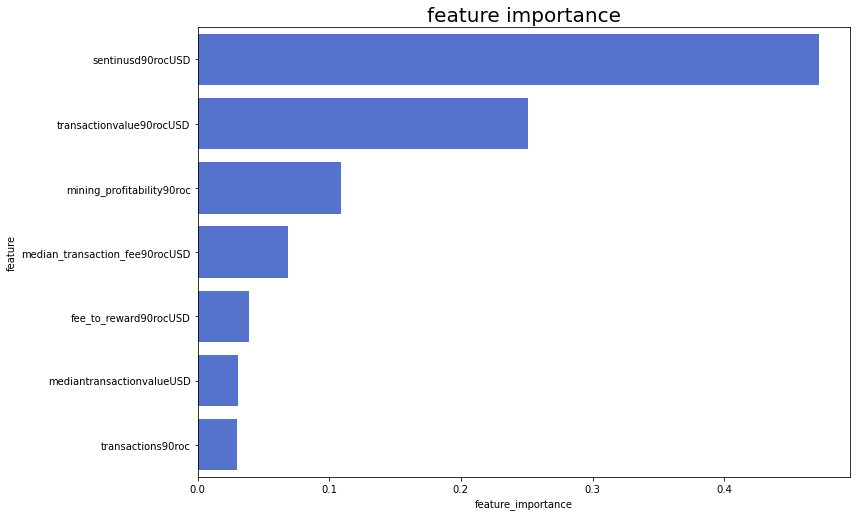

In [38]:
cmns.plot_feature_importance(imp_feat,'feature importance')

In [39]:
imp_feat[imp_feat['feature_importance']>0]


,feature,feature_importance
0,sentinusd90rocUSD,0.472316
1,transactionvalue90rocUSD,0.250791
2,mining_profitability90roc,0.108607
3,median_transaction_fee90rocUSD,0.068857
4,fee_to_reward90rocUSD,0.039209
5,mediantransactionvalueUSD,0.030615
6,transactions90roc,0.029605


In [40]:
selected=imp_feat[imp_feat['feature_importance']>0.001]

In [41]:
selected

,feature,feature_importance
0,sentinusd90rocUSD,0.472316
1,transactionvalue90rocUSD,0.250791
2,mining_profitability90roc,0.108607
3,median_transaction_fee90rocUSD,0.068857
4,fee_to_reward90rocUSD,0.039209
5,mediantransactionvalueUSD,0.030615
6,transactions90roc,0.029605


In [42]:
selected.feature_importance.sum()

1.0

In [43]:
X_high=X[selected.feature]

In [44]:
X_high.shape

(1461, 7)

In [45]:
X_high.sort_index(axis=1,inplace=True)

In [46]:
X_high['priceUSD']=np.ravel(y)

/tmp/ipykernel_490387/957662999.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

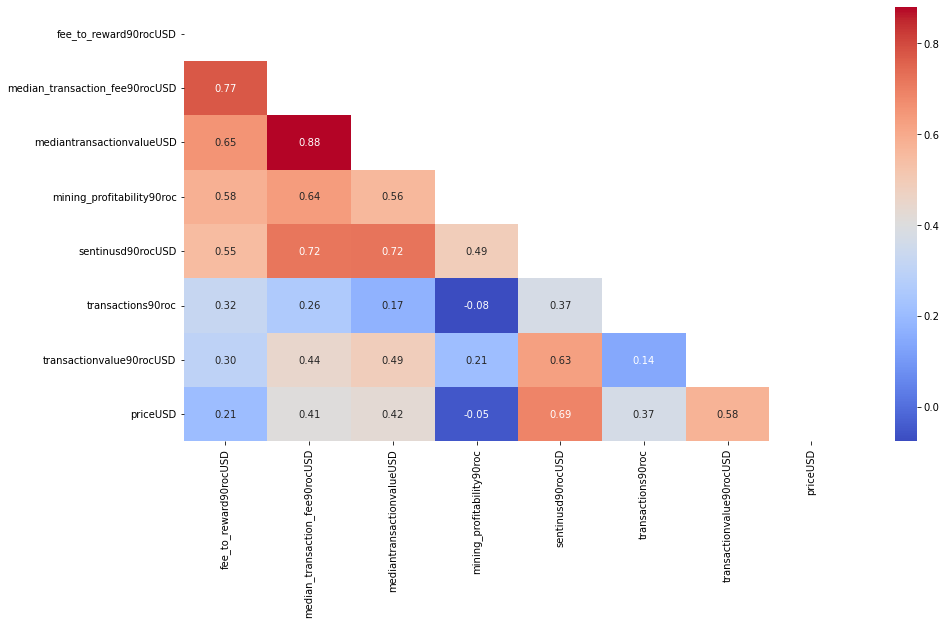

In [47]:
corr = X_high.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr,mask=mask, cmap='coolwarm',annot=True, fmt='.2f')

In [48]:
X_high=X_high[X_high['priceUSD']!=1]

In [49]:
from sklearn.ensemble import IsolationForest
outlier=IsolationForest(contamination=0.3)
price=X_high['priceUSD']
price=price.values
price=np.reshape(price,(-1,1))
outlier.fit(price)
outs=outlier.predict(price)
X_high['outlier']=pd.DataFrame(zip(outs))
X_high=X_high.query('outlier != -1')
X_high.reset_index(drop=True,inplace=True)
X_high.drop(columns=['outlier'],inplace=True)

In [50]:
X_high.to_csv('etc_reg.csv',sep=',',index=False)

In [51]:
X_high.columns

Index(['fee_to_reward90rocUSD', 'median_transaction_fee90rocUSD',
       'mediantransactionvalueUSD', 'mining_profitability90roc',
       'sentinusd90rocUSD', 'transactions90roc', 'transactionvalue90rocUSD',
       'priceUSD'],
      dtype='object')